In [8]:
import numpy as np
import matplotlib.pyplot as plt

from statsmodels.distributions.empirical_distribution import ECDF
from scipy.stats import norm

from tqdm import tqdm



# próbkowanie na ekranie

In [3]:
def mh_normal_sampler(n_samples, delta):
    def normal_density(x):
        return np.exp(-x**2/2) / np.sqrt(2*np.pi)
    def alpha(x, y):
        return normal_density(y) / normal_density(x)
    randoms1 = (np.random.rand(n_samples - 1) * 2 - 1) * delta
    randoms2 = np.random.rand(n_samples - 1)
    samples = [0]
    for random1, random2 in zip(randoms1, randoms2):
        x = samples[-1]
        y = x + random1
        if random2 < alpha(x, y):
            samples.append(y)
        else:
            samples.append(x)

    return np.array(samples)


In [10]:
def compute_ecdf(data, x_vals):
    data_sorted = np.sort(data)
    n = len(data)
    return np.searchsorted(data_sorted, x_vals, side='right') / n

# narkotyki statystyki

In [4]:
from scipy.stats import wasserstein_distance

def ks_statistic(ecdf, cdf_values):
    return np.max(np.abs(ecdf - cdf_values))

def cvm_statistic(ecdf, cdf_values):
    n = len(ecdf)
    return np.sum((ecdf - cdf_values) ** 2) + 1 / (12 * n)

def ad_statistic(ecdf, cdf_values):
    cdf_values = np.clip(cdf_values, 1e-10, 1 - 1e-10)
    n = len(ecdf)
    i = np.arange(1, n + 1)
    log_terms = np.log(cdf_values) + np.log(1 - cdf_values[::-1])
    return -n - np.mean((2 * i - 1) * log_terms)

def kuiper_statistic(ecdf, cdf_values):
    D_plus = np.max(ecdf - cdf_values)
    D_minus = np.max(cdf_values - np.insert(ecdf[:-1], 0, 0))
    return D_plus + D_minus



In [12]:
statistics_names = ["ks", "cvm", "ad", "kp"]
statistics = {"ks": ks_statistic, "cvm": cvm_statistic, "ad": ad_statistic, "kp": kuiper_statistic}
statistics_values = {"ks": [], "cvm": [], "ad": [], "kp": []}

In [13]:
deltas = np.logspace(-4, 4, 10000)

In [14]:
for delta in tqdm(deltas):
    supposedly_normal_sample = mh_normal_sampler(10000, delta)
    dist = ECDF(supposedly_normal_sample)
    x = dist.x
    cdf = norm.cdf(x)
    for statistic_name in statistics_names:
        statistics_values[statistic_name].append(statistics[statistic_name](dist.y, cdf))


100%|██████████| 10000/10000 [03:56<00:00, 42.25it/s]


Text(0.5, 1.0, 'Several  comparison statistics for different deltas')

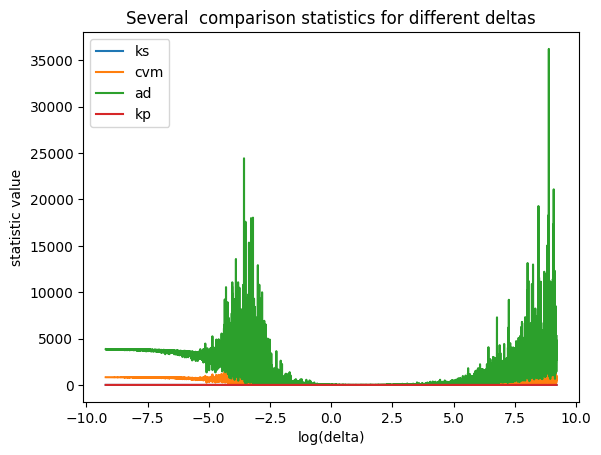

In [15]:
plt.plot(np.log(deltas), statistics_values["ks"], label="ks")
plt.plot(np.log(deltas), statistics_values["cvm"], label="cvm")
plt.plot(np.log(deltas), statistics_values["ad"], label="ad")
plt.plot(np.log(deltas), statistics_values["kp"], label="kp")
plt.legend()
plt.xlabel("log(delta)")
plt.ylabel("statistic value")
plt.title("Several  comparison statistics for different deltas")

# Anderson-Darling nieco psuje skalę więc może jednak osobno ich poplotujemy

Text(0, 0.5, 'statistic value')

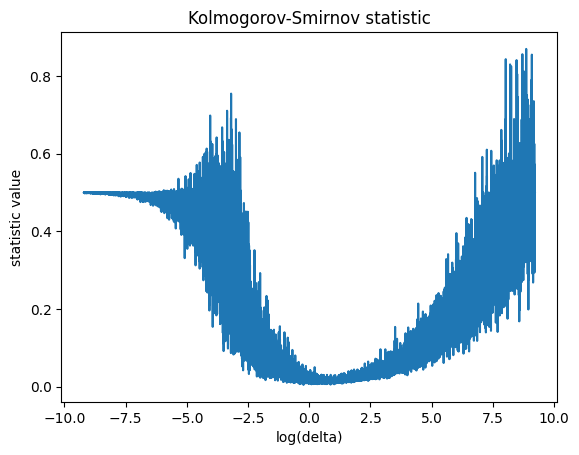

In [17]:
plt.plot(np.log(deltas), statistics_values["ks"])
plt.title("Kolmogorov-Smirnov statistic")
plt.xlabel("log(delta)")
plt.ylabel("statistic value")

Text(0, 0.5, 'statistic value')

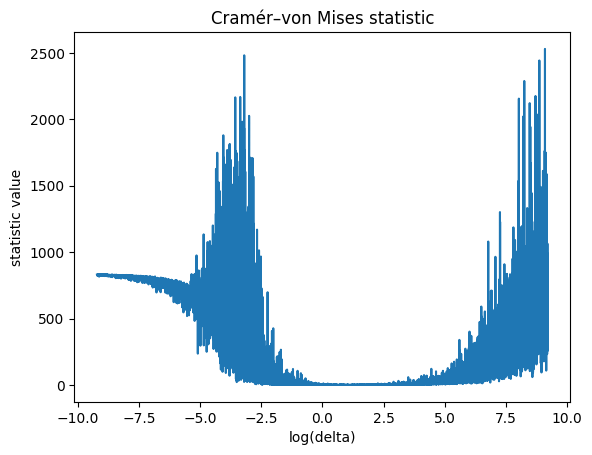

In [18]:
plt.plot(np.log(deltas), statistics_values["cvm"])
plt.title("Cramér–von Mises statistic")
plt.xlabel("log(delta)")
plt.ylabel("statistic value")

Text(0, 0.5, 'statistic value')

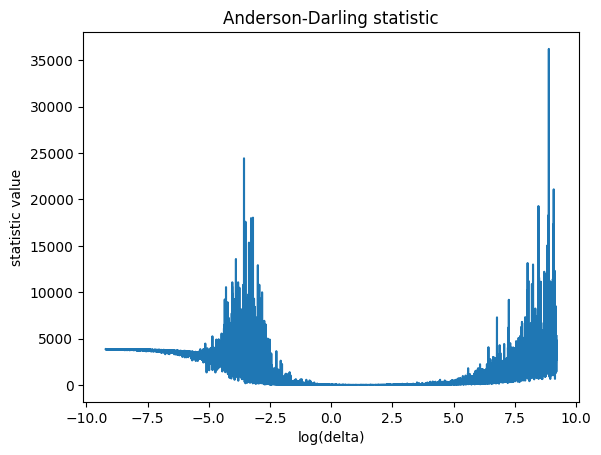

In [19]:
plt.plot(np.log(deltas), statistics_values["ad"])
plt.title("Anderson-Darling statistic")
plt.xlabel("log(delta)")
plt.ylabel("statistic value")

Text(0, 0.5, 'statistic value')

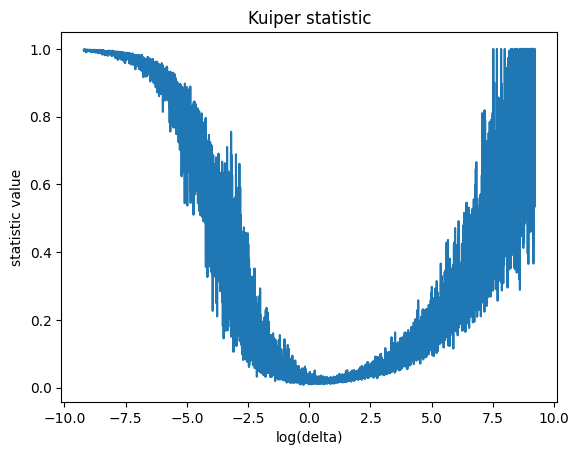

In [20]:
plt.plot(np.log(deltas), statistics_values["kp"])
plt.title("Kuiper statistic")
plt.xlabel("log(delta)")
plt.ylabel("statistic value")